http://dragstar.hatenablog.com/entry/2015/03/23/114335

あるレストランで、手持ちの材料からハンバーグとオムレツを作って利益を最大にしたいと考えている。手持ちの材料は

- ひき肉 3800g
- タマネギ 2100g
- ケチャップ 1200g

であり、それぞれの品を作るのに必要な材料の量は

- ハンバーグ１個あたり　ひき肉60g、タマネギ20g、ケチャップ 20g
- オムレツ１個あたり　ひき肉40g、タマネギ30g、ケチャップ10g

であるとする。販売価格は
- ハンバーグ 400円
- オムレツ　300円

とする。総売り上げを最大にするには、それぞれハンバーグとオムレツを幾つずつ作ればよいか

In [1]:
import pulp

In [2]:
p = pulp.LpProblem('humbrug and omlet', pulp.LpMaximize)

In [3]:
# variables
x = pulp.LpVariable('x', cat='Integer')
y = pulp.LpVariable('y', cat='Integer')

In [4]:
# maximize
p += 400*x + 300*y
p

humbrug and omlet:
MAXIMIZE
400*x + 300*y + 0
VARIABLES
x free Integer
y free Integer

In [5]:
# subjects
p += 60*x + 40*y <= 3800
p += 20*x + 30*y <= 2100
p += 20*x + 10*y <= 1200
p

humbrug and omlet:
MAXIMIZE
400*x + 300*y + 0
SUBJECT TO
_C1: 60 x + 40 y <= 3800

_C2: 20 x + 30 y <= 2100

_C3: 20 x + 10 y <= 1200

VARIABLES
x free Integer
y free Integer

In [6]:
status = p.solve()

print(pulp.LpStatus[status])
print(p.objective)

print("Result")
print("x", x.value())
print("y", y.value())

print("Objective")
print(pulp.value(p.objective))

Optimal
400*x + 300*y
Result
x 30.0
y 50.0
Objective
27000.0


In [7]:
max_value = 400 * x.value() + 300 * y.value()
max_value

27000.0

In [8]:
print("MAX VALUE", "400 * %d + 300 * %d = %d" % (x.value(), y.value(), max_value))

MAX VALUE 400 * 30 + 300 * 50 = 27000


In [9]:
#Plot

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [11]:
x = np.arange(0, 120, 1)

In [12]:
y1 = (-1 * 60 / 40) * x + (3800 / 40)

In [13]:
y2 = (-1 * 20 / 30) * x + (2100 / 30)

In [14]:
y3 = (-1 * 20 / 10) * x + (1200 / 10)

Text(0,0.5,'omlet')

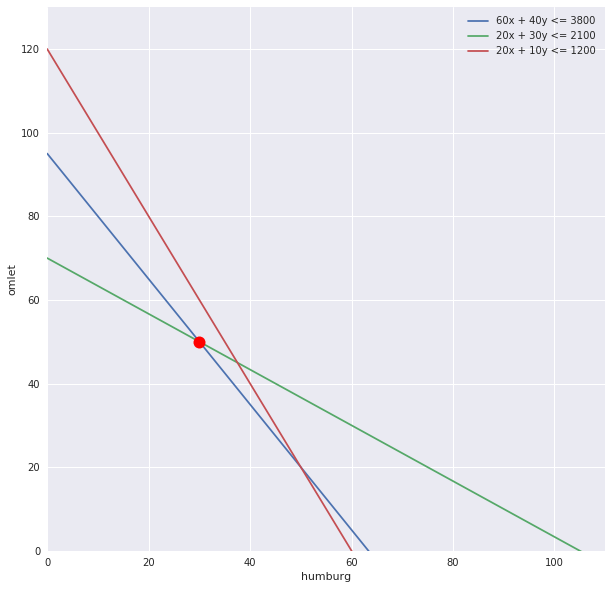

In [15]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(30, 50, "ro", ms=12)
plt.legend(['60x + 40y <= 3800', '20x + 30y <= 2100', '20x + 10y <= 1200'])
plt.xlim((0, 110))
plt.ylim((0, 130))
plt.xlabel('humburg')
plt.ylabel('omlet')
#plt.fill_between(x, y1, facecolor="y", alpha=0.3, interpolate=True)
#plt.fill_between(x, y2, facecolor="y", alpha=0.3, interpolate=True)
#plt.fill_between(x, y3, facecolor="y", alpha=0.3, interpolate=True)